The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


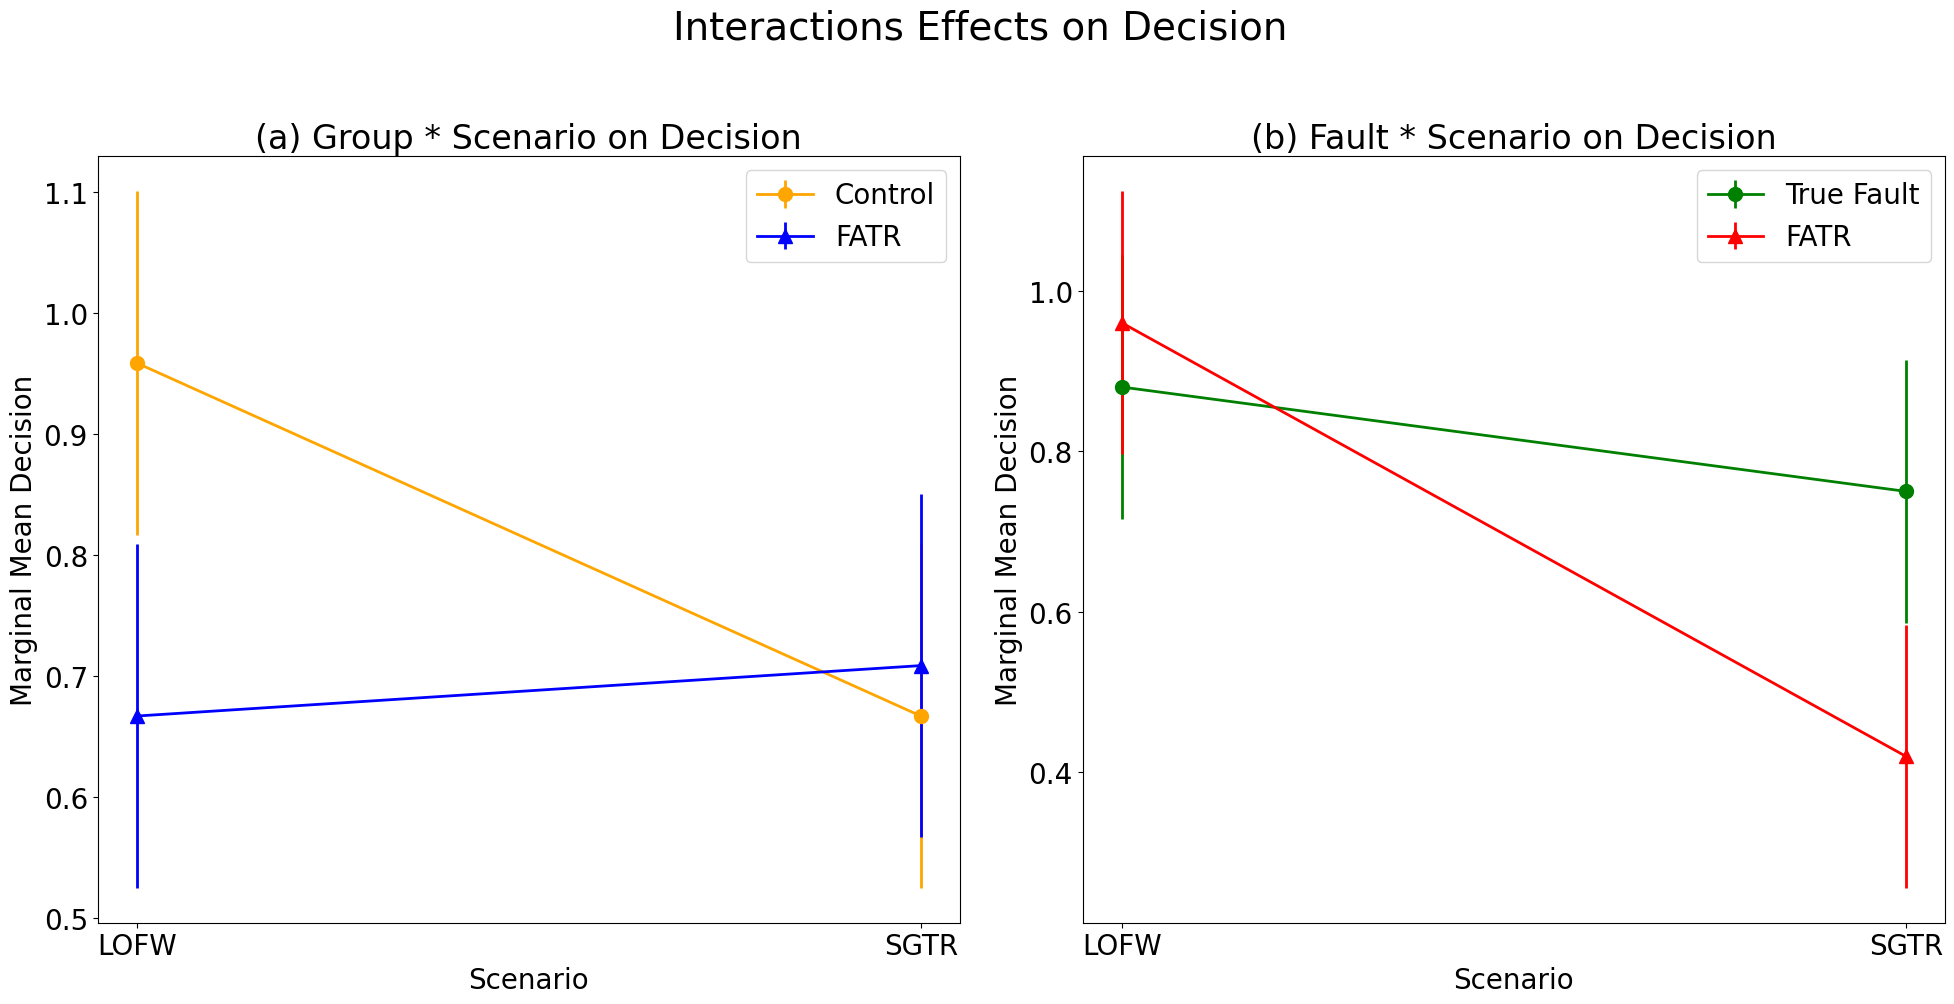

In [7]:
## PLOTS FOR INTERACTION

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Title and filename setup
title = 'Interactions Effects on Decision'
filename = title.replace(' ', '_')

mean00 = [0.95833333, 0.66666667]
mean01 =  [0.66666667, 0.70833333]
error0 = [0.142, 0.142]
x_levels0 = ['LOFW', 'SGTR']
label0 = ['Control', 'FATR']

mean10 = [0.88, 0.75]
mean11 = [0.96, 0.42]
error1 = [0.164, 0.164]
x_levels1 = ['LOFW', 'SGTR']
label1 = ['True Fault', 'Spoof']

# Data for plots
data = {
    "left": {
        "title": '(a) Group * Scenario on Decision',
        "xlabel": 'Scenario',
        "ylabel": 'Marginal Mean Decision',
        "x_levels": x_levels0,
        "lines": [
            {"label": label0[0], "data": mean00, "error": error0, "fmt": '-o', "color": 'orange'},
            {"label": label0[1], "data": mean01, "error": error0, "fmt": '-^', "color": 'blue'}
        ]
    },
    "right": {
        "title": '(b) Fault * Scenario on Decision',
        "xlabel": 'Scenario',
        "ylabel": 'Marginal Mean Decision',
        "x_levels": x_levels1,
        "lines": [
            {"label": label1[0], "data": mean10, "error": error1, "fmt": '-o', "color": 'green'},
            {"label": label0[1], "data": mean11, "error":  error1, "fmt": '-^', "color": 'red'}
        ]
    }
}

# Double the size of all text elements
plt.rcParams.update({'font.size': plt.rcParams['font.size'] * 2})

# Set the figure size and GridSpec layout
fig = plt.figure(figsize=(20, 10))  # Adjusted figure size for better layout
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # Equal width for both subplots

# Create subplots using the GridSpec layout
axs = [plt.subplot(gs[0]), plt.subplot(gs[1])]

# Generalize plotting for any number of plots
for idx, (key, val) in enumerate(data.items()):
    for line in val["lines"]:
        axs[idx].errorbar(val["x_levels"], line["data"], yerr=line["error"], fmt=line["fmt"],
                          label=line["label"], color=line["color"], linewidth=2, markersize=10)
    axs[idx].set_title(val["title"])
    axs[idx].set_xlabel(val["xlabel"])
    axs[idx].set_ylabel(val["ylabel"])
    axs[idx].legend()

# Adding a super title for the entire figure
plt.suptitle(title, fontsize=28, y=1.015)

plt.tight_layout()
plt.savefig(f'{filename}.eps', format='eps', dpi=300, bbox_inches='tight')
plt.savefig(f'{filename}.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

# Reset plt.rcParams to default if needed for other plots in the notebook
plt.rcParams.update(plt.rcParamsDefault)
